# Prediction of the client's subscription using Classification 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [2]:
### Q. Read the bank dataset 

In [3]:
import pandas as pd
import numpy as np

bank_data = pd.read_csv('C:\\Users\\vishd\\Desktop\\chapter\\Machine learning\\Classification II\\bank.csv', sep=';')
bank_data.head()
bank_data['y'] = bank_data['y'].map({'yes': 1, 'no': 0})
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [4]:
### Data transformation
bank_data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [5]:
bank_data['education']=np.where(bank_data['education'] =='basic.9y', 'Basic', bank_data['education'])
bank_data['education']=np.where(bank_data['education'] =='basic.6y', 'Basic', bank_data['education'])
bank_data['education']=np.where(bank_data['education'] =='basic.4y', 'Basic', bank_data['education'])

After grouping, this is the columns

In [6]:
bank_data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

### Data exploration

In [7]:
### Q. Find out in the target column what is the respective count of values
### Q. Also plot the values of y in form of a bar graph

AxesSubplot(0.125,0.125;0.775x0.755)


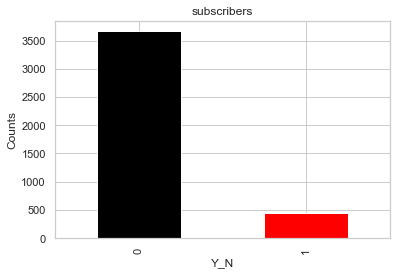

In [8]:
from matplotlib import pyplot as plt
count = bank_data['y'].value_counts().plot(kind="bar",color = ['black','red']) 
plt.rcParams["figure.figsize"] = [10, 6]
#bank_data['y'].plot(kind="bar", color=['black', 'red'])
plt.title("subscribers")
plt.xlabel("Y_N")
plt.ylabel("Counts")
print(count) 

In [9]:
#count = bank_data['y'].value_counts()
#print(count)

count = bank_data['y', 'job']
print(count)

KeyError: ('y', 'job')

There are 3668 no's and 451 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [10]:
import pandas as pd
import numpy as np
#bankdata_dummies = pd.get_dummies(bank_data, columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'])#, drop_first = True)
bankdata_dummies = pd.get_dummies(bank_data,columns=['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'])
#print(bankdata_dummies)
bankdata_dummies.head()
#print(bankdata_dummies['job'])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_0,y_1
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,0,1,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,0,0,1,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,1,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,1,0,0,0,0,0,1,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,0,0,1,0,1,0


In [11]:
#import numpy as np 
#from sklearn.preprocessing import StandardScaler 
#from patsy import dmatrices
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#y = bankdata_df['Catdata_types']
#X =bankdata_df.drop(columns = ['Catdata_types'])
#scaler =StandardScaler()
#scaler =StandardScaler()
#X_scaled = scaler.fit_transform(X)
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#variables = X_scaled

#vif = pd.DataFrame()
#vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
#vif["Features"] = X.columns
#print(vif)

In [12]:
## Q. find the average of the remaining variables by different values of 'y'

## Q. Mention the key findings out of the previous split

In [13]:
bankdata_dummies.groupby(['y_yes','y_no']).mean()

KeyError: 'y_yes'

Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [14]:
### Find the mean of other variables by different values of 'job' variable

In [15]:
import pandas as pd
#print(bank_data)
#c = pd.get_dummies(bank_data, columns=['job'])
#bankdata_dummies.groupby(['job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown']).mean()
bank_data.groupby(['job']).mean()
#b.head()
#.mean()

#bank_data.groupby(['job']).count()
#v = bank_data1.groupby(['job']).mean()
#print(v)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885,0.131423
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611,0.069005
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000,0.054054
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727,0.100000
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914,0.092593
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048,0.228916
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843,0.081761
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870,0.089059
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341,0.231707


In [16]:
### Find the mean of other variables by different values of 'marital' variable

In [ ]:
#bank_data.groupby('marital').mean()
bank_data.groupby(['marital']).mean()


In [ ]:
### Find the mean of other variables by different values of 'education' variable

In [ ]:
bank_data.groupby(['education']).mean()

Visualizations

In [ ]:
from matplotlib import pyplot as plt

#groups = bank_data.groupby(['job','y']).count()
#jobyData = bank_data.loc[ : , ['job', 'y'] ].head(10)
#print(jobyData)
#groups.plot.bar()
#import matplotlib.pyplot as plt
#count = bank_data['y'].value_counts()
#print(count)
#ax = df.plot(x="X", y="A", kind="bar")
#jobyData.groupby('y').plot(x="job", y="y", kind="bar")
#bank_data.loc[ : , ['job', 'y'] ].head(200).groupby('job').plot(kind="bar")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#your_df = pd.DataFrame(data={'type': ['A','B','C'],
   #   'price1':[5450, 5450, 15998],
   #   'price2' : [3216, 20000, 15000]})

#long_df = pd.melt(bank_data, id_vars=['job'], value_vars=['y'])
#print(long_df)

#d = bank_data.groupby('job')['y'].value_counts()
#pd.DataFrame(d, )
#d.columns = ['job', 'y', 'value']
#print(d)
#d.plot(kind="bar",color = ['black','red']) 

#my_plot = sns.barplot(x="job", y="value",hue = "variable", data=long_df)
#sns.plt.show()
#m = bank_data["y"].counts()
#print(m)
#bank_data.plot(x="m", y="job", kind="bar")
##d = bank_data.groupby('y')['job'].value_counts()
#d.plot(kind="bar",color = ['black','red']) 
#plt.show()bank_data

x = bank_data.groupby('job').count()['y']
#y = bank_data['job']
#print(y)
x.plot(kind="bar",color = ['black','red']) 
plt.show()
#plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, 
        # marker='o', markerfacecolor='blue', markersize=12)

Text(0, 0.5, 'Frequency of Purchase')

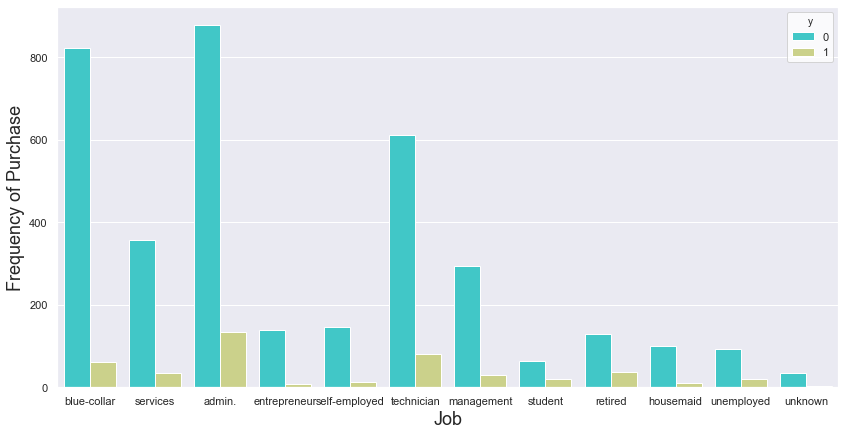

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.figure(figsize = (14,7))
plt.xlabel("Job",fontsize=18)
#plt.ylabel("Frequency of Purchase",fontsize=18)
#plt.title("Purchase Frequency for Job tTitle",fontsize=22)
sns.set_style('whitegrid')
#fig, ax = plt.subplots(figsize=11)
sns.countplot(x='job', hue='y',data=bank_data,palette='rainbow')
plt.xlabel("Job",fontsize=18)
plt.ylabel("Frequency of Purchase",fontsize=18)

### Create a visualization as shown below for variable 'job' and frequency of purchase

In [ ]:
#ns.barplot(['job', 'y', data ='' bank_data'])
import the seaborn libaray 
import seaborn as sns 
barplot([x, y, bank_data, order, hue_order])

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [ ]:
### Create a stacked bar chart between variables 'Marital Status','Purchase' and Proportion of Customers


Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

In [ ]:
### Create a stacked bar chart between variables 'Education','Purchase' and Proportion of Customers



Education seems a good predictor of the outcome variable.

In [ ]:
### Create a stacked bar chart between variables 'day_of_week' and Proportion of Customers grouped by variable 'y'



Day of week may not be a good predictor of the outcome

In [ ]:
## Q. Write code for the visualization as shown below

Month might be a good predictor of the outcome variable

In [ ]:
## Q. Write code for the visualization as shown below

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [ ]:
## Q. Write code for the visualization as shown below

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [ ]:
## Write code to convert following columns to equivalent dummy variables

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']


In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

### Feature Selection

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [ ]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

### Implementing the model

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [ ]:
## Write code to import Logistic Regression module from SKlearn library and train the X,Y variables on that Logistic Regression object

#### Predicting the test set results and caculating the accuracy

In [ ]:
## Perform predictions on the Test dataset

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

### Cross Validation

In [ ]:
## Write down code for a 10 fold cross validation on the given X,Y variables

### Confusion Matrix

In [ ]:
## Create the confusion matrix

The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

#### Accuracy

In [ ]:
## Find the accuracy of your model

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [ ]:
## Draw ROC curve for your model